In [18]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import kagglehub
import os

# Download latest version
dataset_dir  = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset")

for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(dataset_dir, filename)
        break  # Stop searching after finding the first CSV file

# Load the dataset to inspect its structure and contents
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


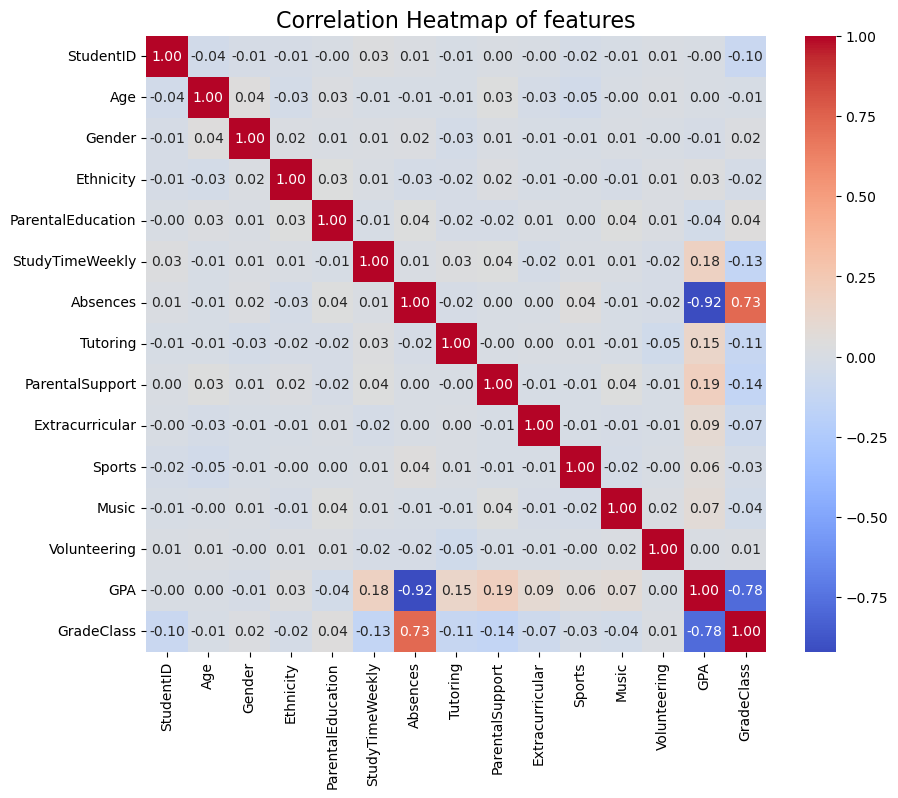

In [20]:
#identifying correlations
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of features', fontsize=16)
plt.show()


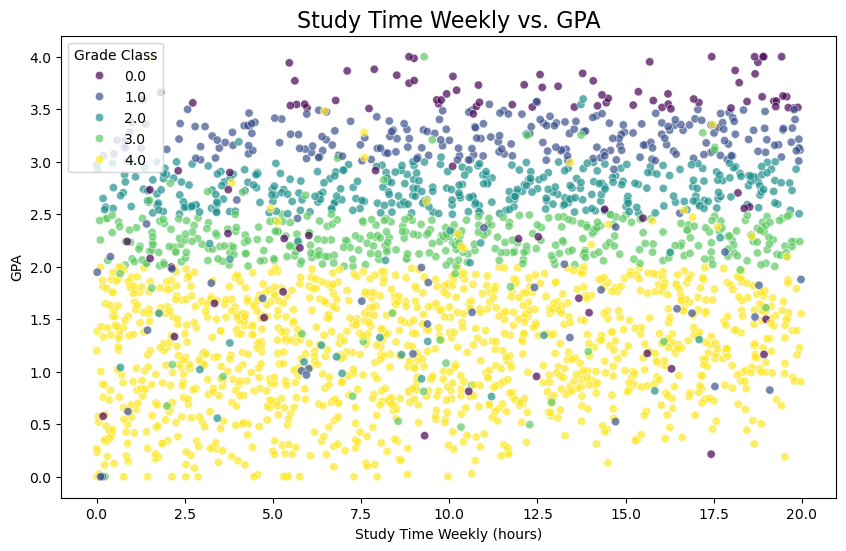

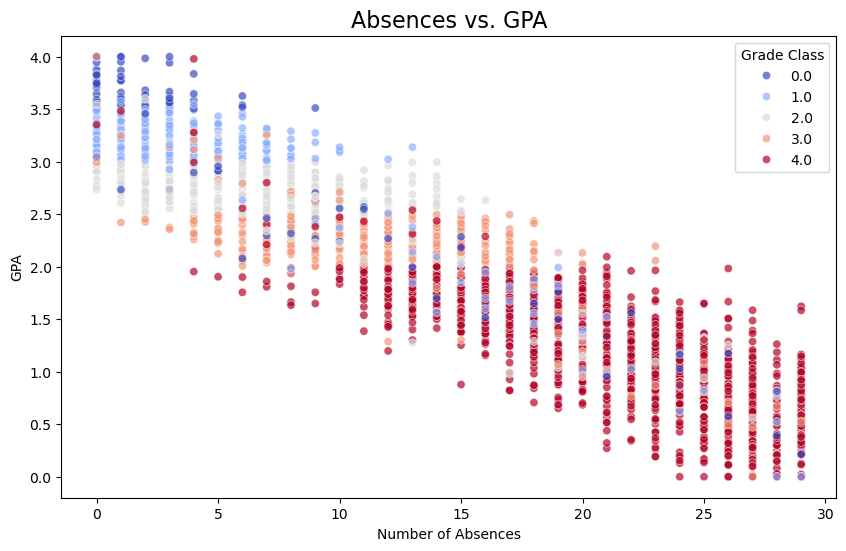

In [21]:
# Scatter plot for StudyTimeWeekly vs. GPA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='StudyTimeWeekly', y='GPA', hue='GradeClass', palette='viridis', alpha=0.7)
plt.title("Study Time Weekly vs. GPA", fontsize=16)
plt.xlabel("Study Time Weekly (hours)")
plt.ylabel("GPA")
plt.legend(title="Grade Class", loc="upper left")
plt.show()

# Scatter plot for Absences vs. GPA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Absences', y='GPA', hue='GradeClass', palette='coolwarm', alpha=0.7)
plt.title("Absences vs. GPA", fontsize=16)
plt.xlabel("Number of Absences")
plt.ylabel("GPA")
plt.legend(title="Grade Class", loc="upper right")
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler

# Features to normalize
features_to_normalize = ['StudyTimeWeekly', 'Absences', 'GPA']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
data_normalized = data.copy()
data_normalized[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Encode categorical variables if necessary (Gender, Ethnicity, etc.)
data_encoded = pd.get_dummies(data_normalized, columns=['Gender', 'Ethnicity'], drop_first=True)

# Display the first few rows of the preprocessed data
data_encoded.head()


,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Gender_1,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,1001,17,2,1.780336,-0.890822,1,2,0,0,1,0,1.118086,2.0,True,False,False,False
1,1002,18,1,0.997376,-1.717694,0,1,0,0,0,0,1.242374,1.0,False,False,False,False
2,1003,15,3,-0.984045,1.353542,0,2,0,0,0,0,-1.960277,4.0,False,False,True,False
3,1004,17,3,0.045445,-0.063951,0,3,1,0,0,0,0.161790,3.0,True,False,False,False
4,1005,17,2,-0.902311,0.290422,1,3,0,0,0,0,-0.675573,4.0,True,False,False,False


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Features and target variable
X = data_encoded.drop(columns=['StudentID', 'GradeClass'])
y = data_encoded['GradeClass']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Save the trained model
model_path = '/student_performance_model.pkl'
joblib.dump(model, model_path)

# Save the column names in the same order as the training data
columns_order = X.columns.tolist()
joblib.dump(columns_order, 'columns_order.pkl')


accuracy, classification_rep, model_path


(0.9164926931106472,
 '              precision    recall  f1-score   support\n\n         0.0       1.00      0.38      0.55        21\n         1.0       0.86      0.89      0.87        54\n         2.0       0.91      0.94      0.92        78\n         3.0       0.88      0.89      0.89        83\n         4.0       0.94      0.97      0.96       243\n\n    accuracy                           0.92       479\n   macro avg       0.92      0.81      0.84       479\nweighted avg       0.92      0.92      0.91       479\n',
 '/student_performance_model.pkl')

In [24]:
y_train.value_counts()


GradeClass
4.0    968
3.0    331
2.0    313
1.0    215
0.0     86
Name: count, dtype: int64